# Unsupervised Learning Menggunakan Algoritma K-Means Clustering

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv("income clean.csv")

In [4]:
df.duplicated().sum()

0

In [5]:
df.head(5)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Karena unsupervised tidak mempunyai label jadi akan saya drop kolom targetnya

In [6]:
x = df.drop(' income',axis=1)

Mengubah data object menjadi numerikal

In [7]:
x = pd.get_dummies(x)
x.head()

,Unnamed: 0,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,39,77516,13,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,50,83311,13,0,0,13,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,38,215646,9,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,53,234721,7,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,28,338409,13,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Membuat objek cluster dari K Means dengan jumlah cluster = 3

In [8]:
model = KMeans(n_clusters=3)

Memilih attribute mana yang akan dilatih

In [9]:
points = df[[" fnlwgt"," capital-gain"]]

In [10]:
model.fit(points)

KMeans(n_clusters=3)

In [11]:
labels = model.labels_

In [12]:
labels

array([1, 1, 0, ..., 0, 0, 0])

# Evaluasi Hasil Pemodelan

Buat dataframe dengan label dan age sebagai kolom

In [13]:
dataset_KMeans = pd.DataFrame({'labels' : labels, 'Age' : df.age})

In [14]:
ct = pd.crosstab(dataset_KMeans["labels"],dataset_KMeans["Age"])

In [15]:
ct

Age,17,18,19,20,21,22,23,24,25,26,...,80,81,82,83,84,85,86,87,88,90
labels,,,,,,,,,,,,,,,,,,,,,
0,190,247,340,373,364,369,452,421,434,414,...,10,5,3,6,5,1,1,0,2,17
1,152,206,234,253,229,252,273,245,261,258,...,11,14,8,0,3,2,0,1,1,19
2,53,97,134,126,125,144,151,132,143,113,...,1,1,1,0,2,0,0,0,0,6


# Melihat Centroid dari model yang sudah dibuat

Mengambil data dari kolom fnlwgt dan capital gain

In [16]:
x = points[' fnlwgt']
y = points[' capital-gain']

Berguna untuk menampung kordinat untuk setiap centroid

In [17]:
centroids = model.cluster_centers_
centroids_x = centroids[0:,1]
centroids_y = centroids[0:,1]

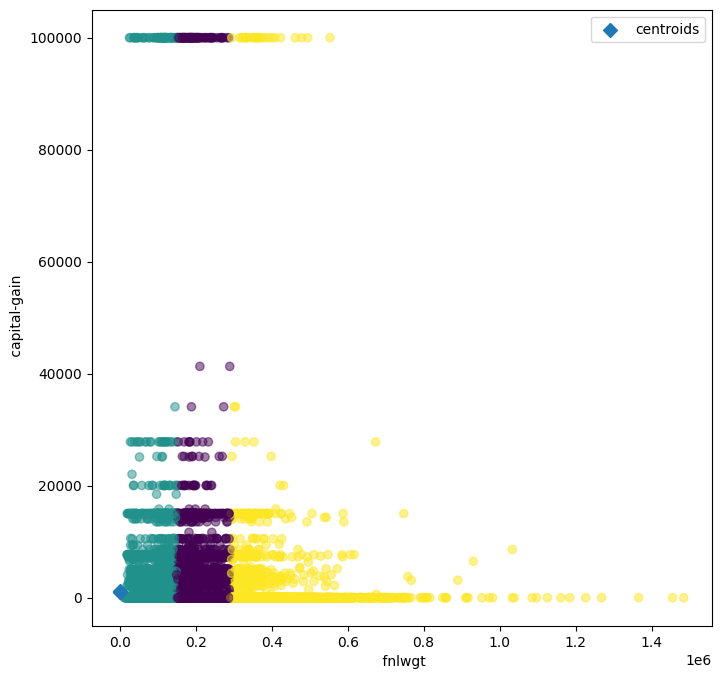

In [18]:
plt.figure(figsize =(8,8))
plt.scatter(x,y,alpha = 0.5, c=labels)
plt.scatter(centroids_x, centroids_y, marker='D', s=50, label='centroids')
plt.xlabel(' fnlwgt')
plt.ylabel(' capital-gain')
plt.legend()
plt.show()